# PnL Code

Purpose of this code it to imput the purhcase date, size, ticker and print PnL

### Import Libraries

In [6]:
from tardis_dev import datasets
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Download Data

In [7]:
import nest_asyncio

nest_asyncio.apply()
datasets.download(
    exchange="binance-futures",
    data_types=[
        "incremental_book_L2",
        #"trades",
        #"quotes",
        #"derivative_ticker",
        #"book_snapshot_25",
        #"liquidations"
    ],
    from_date=f"2023-02-01T00:00:00Z",
    to_date=f"2023-02-01T01:59:59Z",
    symbols=['BTCUSDT'],
    api_key='',
)

nest_asyncio.apply()
datasets.download(
    exchange="binance",
    data_types=[
        "incremental_book_L2",
        #"trades",
        #"quotes",
        #"derivative_ticker",
        #"book_snapshot_25",
        #"liquidations"
    ],
    from_date=f"2023-02-01T00:00:00Z",
    to_date=f"2023-02-01T01:59:59Z",
    symbols=['BTCUSDT'],
    api_key='',
)

nest_asyncio.apply()
datasets.download(
    exchange="binance-futures",
    data_types=[
        #"incremental_book_L2",
        #"trades",
        "quotes",
        #"derivative_ticker",
        #"book_snapshot_25",
        #"liquidations"
    ],
    from_date=f"2023-02-01T00:00:00Z",
    to_date=f"2023-02-01T01:59:59Z",
    symbols=['BTCUSDT'],
    api_key='',
)

nest_asyncio.apply()
datasets.download(
    exchange="binance",
    data_types=[
        #"incremental_book_L2",
        #"trades",
        "quotes",
        #"derivative_ticker",
        #"book_snapshot_25",
        #"liquidations"
    ],
    from_date=f"2023-02-01T00:00:00Z",
    to_date=f"2023-02-01T01:59:59Z",
    symbols=['BTCUSDT'],
    api_key='',
)

fname_spotquotes = 'binance_quotes_2023-02-01_BTCUSDT.csv.gz'
fname_perpquotes = 'binance-futures_quotes_2023-02-01_BTCUSDT.csv.gz'
fname_perp = 'binance-futures_incremental_book_L2_2023-02-01_BTCUSDT.csv.gz'
fname_spot = 'binance_incremental_book_L2_2023-02-01_BTCUSDT.csv.gz'

In [8]:
perpbook = pd.read_csv(f'datasets/{fname_perp}', compression='gzip')
spotbook = pd.read_csv(f'datasets/{fname_spot}', compression='gzip')

In [26]:
perpquotes = pd.read_csv(f'datasets/{fname_perpquotes}', compression='gzip')
spotquotes = pd.read_csv(f'datasets/{fname_spotquotes}', compression='gzip')

In [9]:
def bookstate(book, snaptime):
    snapts = pd.to_datetime(snaptime).timestamp()*1000000
    if snapts < book['timestamp'].values[0]:
        snapts = book['timestamp'].values[0]
    book = book[book['timestamp'] <= snapts]
    book = book.sort_values(['price', 'timestamp'], ascending=False).groupby('price').head(1)
    # note that groupby.head preserves the index of the initial dataframe, and results in unintended behavior
    book = book[book['amount'] > 0.00]
    
    return book

df=bookstate(spotbook, 1675227824977135)

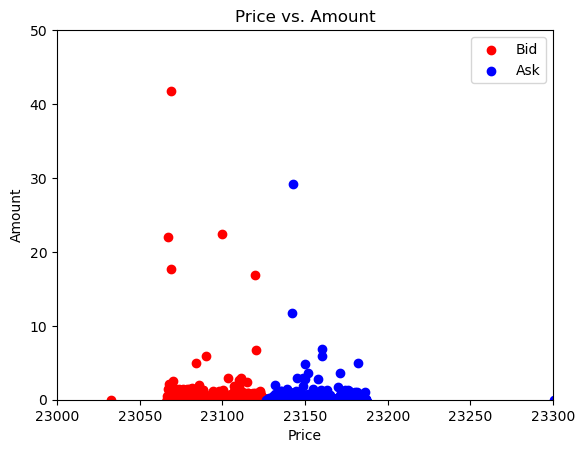

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' containing the data
# with columns: exchange, symbol, timestamp, local_timestamp, is_snapshot, side, price, amount

# Filter data for bid and ask separately
bid_data = df[df['side'] == 'bid']
ask_data = df[df['side'] == 'ask']

# Plotting bid points as red dots
plt.scatter(bid_data['price'], bid_data['amount'], color='red', label='Bid')

# Plotting ask points as blue dots
plt.scatter(ask_data['price'], ask_data['amount'], color='blue', label='Ask')

plt.xlabel('Price')
plt.ylabel('Amount')
plt.title('Price vs. Amount')

# Display the legend
plt.legend()

plt.xlim(23000,23300)
plt.ylim(0,50)
# Display the plot
plt.show()


In [32]:
bid_data

,exchange,symbol,timestamp,local_timestamp,is_snapshot,side,price,amount
2187,binance,BTCUSDT,1675209602162275,1675209602162275,True,bid,23126.20,0.03000
2188,binance,BTCUSDT,1675209602162275,1675209602162275,True,bid,23126.07,0.05807
2189,binance,BTCUSDT,1675209602162275,1675209602162275,True,bid,23126.06,0.12123
2191,binance,BTCUSDT,1675209602162275,1675209602162275,True,bid,23126.04,0.04411
2122,binance,BTCUSDT,1675209602162275,1675209602162275,True,bid,23126.02,0.03498
...,...,...,...,...,...,...,...,...
2110,binance,BTCUSDT,1675209602162275,1675209602162275,True,bid,22671.10,0.00048
2154,binance,BTCUSDT,1675209602162275,1675209602162275,True,bid,21500.00,177.17283
2089,binance,BTCUSDT,1675209602162275,1675209602162275,True,bid,20888.00,27.42850
2182,binance,BTCUSDT,1675209602162275,1675209602162275,True,bid,11563.19,0.00103


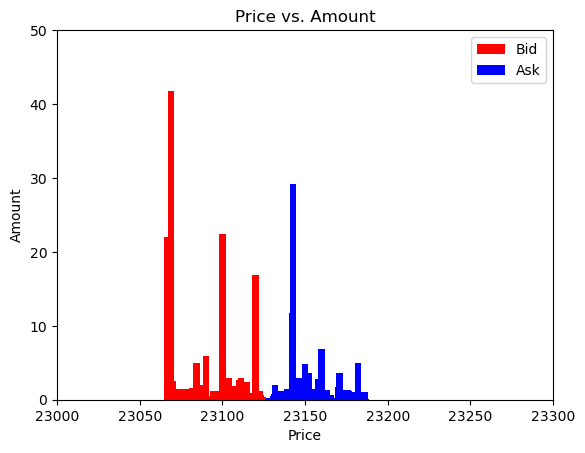

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' containing the data
# with columns: exchange, symbol, timestamp, local_timestamp, is_snapshot, side, price, amount

# Filter data for bid and ask separately
bid_data = df[df['side'] == 'bid']
ask_data = df[df['side'] == 'ask']

# Set the desired bin size
bin_size = 4

# Plotting bid points as red bars with adjusted bin size
plt.bar(bid_data['price'], bid_data['amount'], width=bin_size, color='red', label='Bid')

# Plotting ask points as blue bars with adjusted bin size
plt.bar(ask_data['price'], ask_data['amount'], width=bin_size, color='blue', label='Ask')

plt.xlabel('Price')
plt.ylabel('Amount')
plt.title('Price vs. Amount')

# Display the legend
plt.legend()

plt.xlim(23000, 23300)
plt.ylim(0, 50)

# Display the plot
plt.show()



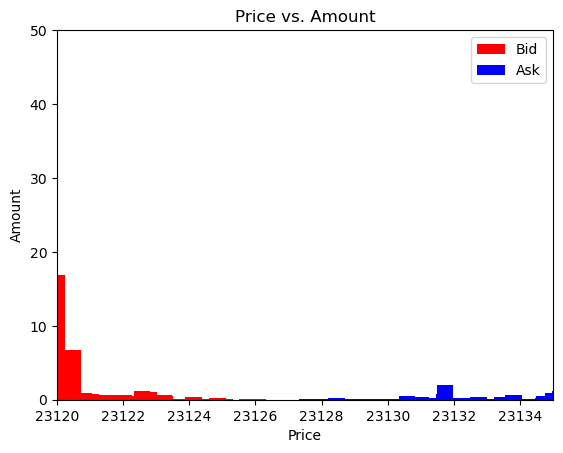

,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount
0,binance,BTCUSDT,1675209602162275,1675209602162275,0.00066,23126.52,23126.2,0.03


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' containing the data
# with columns: exchange, symbol, timestamp, local_timestamp, is_snapshot, side, price, amount

# Filter data for bid and ask separately
bid_data = df[df['side'] == 'bid']
ask_data = df[df['side'] == 'ask']

# Set the desired bin size
bin_size = 0.5

# Plotting bid points as red bars with adjusted bin size
plt.bar(bid_data['price'], bid_data['amount'], width=bin_size, color='red', label='Bid')

# Plotting ask points as blue bars with adjusted bin size
plt.bar(ask_data['price'], ask_data['amount'], width=bin_size, color='blue', label='Ask')

plt.xlabel('Price')
plt.ylabel('Amount')
plt.title('Price vs. Amount')

# Display the legend
plt.legend()

plt.xlim(23120, 23135)
plt.ylim(0, 50)

# Display the plot
plt.show()


spotquotes

target_timestamp = 1675209602162275

# Use loc to find the row with the specified timestamp
target_row = spotquotes.loc[spotquotes['timestamp'] == target_timestamp]

target_row

## Book Pressure Signal Explanation

Consider an orderbook that looks like the following

    Bid Qty  |  Price  |  Offer Qty


             |   104   |   370   
             |   103   |   200   
      100    |   102   |         
      150    |   101   |         

Would the book tick up first? Or down first?

What might we think the theoretical 'fair' price is in this market?

The first observation we might make is that there's more (twice as much) demand at the best offer than at the best bid. 

If we assume that market buys and market sells arrive roughly with even probability/size, then we'd expect that the best bid would be exhausted before the best offer twice as often than the best offer would be exhausted before the best bid

**Book Pressure** is our expected future fair value derived from this assumption. 

We can derive the book pressure using this example.

We expect that the best bid gets exhausted 2/3 of the time as often as the best offer, so we can write

$\text{E(future price)} = \text{P}(\text{best bid exhausted}) * \text{best bid price} + \text{P}(\text{best ask exhaused}) *\text{best ask price}$

$2/3 * (102) + 1/3 * (103)$

$204/3 + 103/3$

$307/3$

$102.3333$

The more traditional representation of the formula is as follows:

$\dfrac{\text{(best bid qty * best offer price) + (best offer qty * best bid price)}}{\text{best bid qty + best offer qty}}$

Plugging in our values from the sample orderbook above, we double check that

$\dfrac{(100 * 103) + (200 * 102)}{{100 + 200}}$

$\dfrac{(10300) + (20400)}{{300}}$

$\dfrac{(30700)}{{300}}$

$102.3333$

<AxesSubplot: title={'center': 'Spot BTCUSD'}, xlabel='timestamp'>

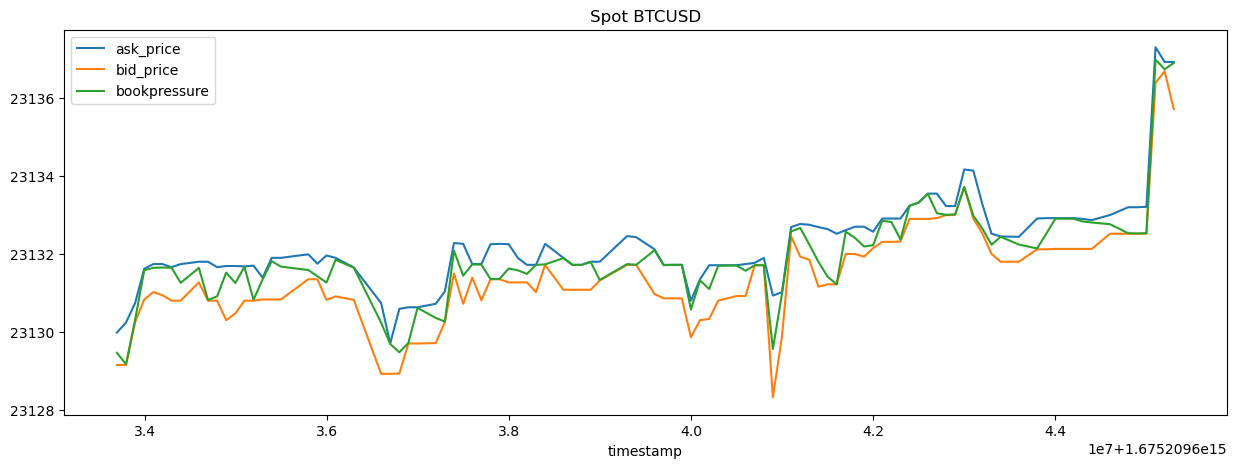

In [42]:
def bookpressure(quotes):
    quotes['bookpressure'] = (quotes['ask_amount'] * quotes['bid_price'] + quotes['bid_amount'] * quotes['ask_price'])/(quotes['ask_amount'] + quotes['bid_amount'])
    return quotes

bookpressure(spotquotes).iloc[300:400,:].set_index('timestamp')[['ask_price', 'bid_price', 'bookpressure']].plot(figsize=(15,5), title="Spot BTCUSD")

<AxesSubplot: title={'center': 'Perp BTCUSD'}, xlabel='timestamp'>

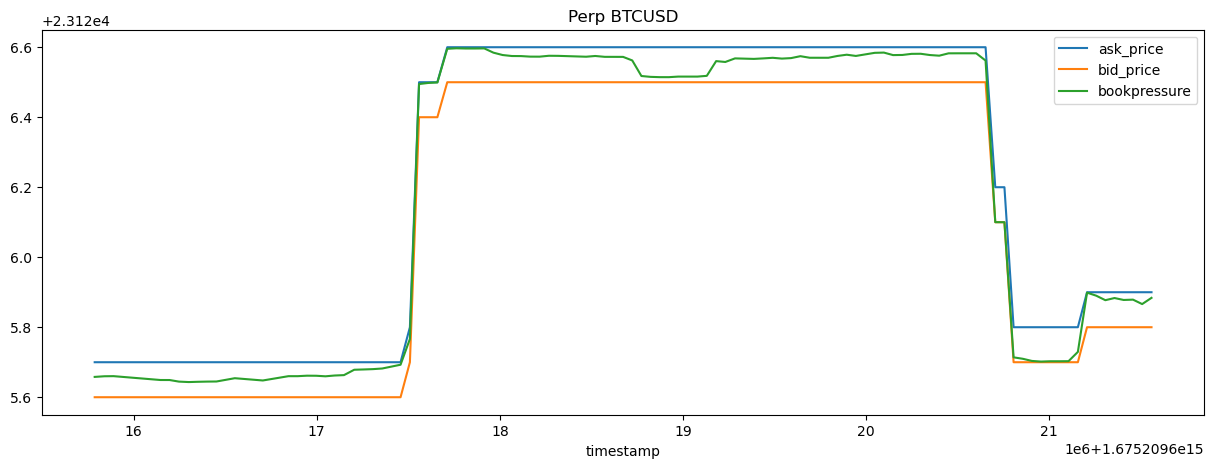

In [43]:
bookpressure(perpquotes).iloc[300:400,:].set_index('timestamp')[['ask_price', 'bid_price', 'bookpressure']].plot(figsize=(15,5),title="Perp BTCUSD")

In [45]:
perpquotes.head(2)

,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount,bookpressure
0,binance-futures,BTCUSDT,1675209600232000,1675209600938091,6.736,23119.5,23119.4,11.939,23119.463930
1,binance-futures,BTCUSDT,1675209602110000,1675209602113182,6.736,23119.5,23119.4,12.289,23119.464594


In [50]:
bpspot = bookpressure(spotquotes).set_index('timestamp')
bpperp = bookpressure(perpquotes).set_index('timestamp')
combinedbp = bpperp.join(bpspot, lsuffix='_perp', rsuffix='_spot')
combinedbp[['ask_amount_spot', 'ask_price_spot', 'bid_price_spot', 'bid_amount_spot', 'bookpressure_spot']] = combinedbp[['ask_amount_spot', 'ask_price_spot', 'bid_price_spot', 'bid_amount_spot', 'bookpressure_spot']].ffill()
combinedbp[['ask_amount_spot', 'ask_price_spot', 'bid_price_spot', 'bid_amount_spot', 'bookpressure_spot']] = combinedbp[['ask_amount_spot', 'ask_price_spot', 'bid_price_spot', 'bid_amount_spot', 'bookpressure_spot']].bfill()
combinedbp['bookpressure_spot'].ffill(inplace=True)
combinedbp['bookpressure_spot'].bfill(inplace=True)
combinedbp['bookpressure_perp'].ffill(inplace=True)


In [51]:
def strategy(combinedbp, buycondition, sellcondition, holdtime, cost=0):
    combinedbp['profit'] = 0
    combinedbp['cost'] = 0
    combinedbp[f'ask_amount_spot_{holdtime}'] = combinedbp['ask_amount_spot'].shift(-holdtime)
    combinedbp[f'bid_amount_spot_{holdtime}'] = combinedbp['bid_amount_spot'].shift(-holdtime)
    combinedbp[f'ask_price_spot_{holdtime}'] = combinedbp[f'ask_price_spot'].shift(-holdtime)
    combinedbp[f'bid_price_spot_{holdtime}'] = combinedbp[f'ask_price_spot'].shift(-holdtime)
    buys = combinedbp[buycondition]
    buys['profit'] = (buys['ask_price_spot'] - buys[f'bid_price_spot_{holdtime}']) * buys['ask_amount_spot']
    buys['cost'] = (cost * buys['bid_amount_spot'])
    sells = combinedbp[sellcondition]
    sells['profit'] = (sells['bid_price_spot'] - sells[f'ask_price_spot_{holdtime}']) * sells['bid_amount_spot'] 
    sells['cost'] = (cost * sells['ask_amount_spot'])
    
    return sells['profit'].fillna(0).sum() + buys['profit'].fillna(0).sum() - buys['cost'].fillna(0).sum() -  sells['cost'].fillna(0).sum()

In [55]:
buycondition = (combinedbp['bookpressure_perp'] > combinedbp['bookpressure_spot'])
sellcondition = (combinedbp['bookpressure_perp'] < combinedbp['bookpressure_spot'])
strategy(combinedbp, buycondition, sellcondition, holdtime=80, cost=0)

-96101.5277244061